#**Desafío Alura Store**



#**Introducción**

En el presente informe se aborda el desafío de apoyar al Sr. Juan en la toma de una decisión estratégica para su cadena de tiendas, Alura Store. El objetivo principal es determinar cuál de las cuatro tiendas debe ser vendida con el fin de liberar recursos para un nuevo emprendimiento. Para ello, se realiza un análisis detallado de los datos relacionados con ventas, rendimiento operativo y valoraciones de clientes de cada una de las sucursales. A partir de este análisis, se busca identificar la tienda menos eficiente y formular una recomendación fundamentada que respalde la decisión final.

#**Importación de datos**



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


In [3]:
#quedan del tipo data frame
type(tienda1)

pandas.core.frame.DataFrame

**Estructura de datos:**

**Producto y Categoría:** Artículos vendidos y sus calificaciones.

**Precio y Envío:** Valores de venta y costos asociados.

**Fecha y ubicación de compra:** Información temporal y geográfica.

**Evaluación de compra:** Comentarios de clientes.

**Tipo de Pago y Cuotas:** Métodos utilizados por los clientes.

**Coordenadas Geográficas:** Ubicación de las transacciones.

In [4]:
tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [5]:
tienda1.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [6]:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [7]:
tienda2.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.732274e+05,25216.235693,4.037304,2.902501,5.499753,-74.742963
std,5.955595e+05,31741.375166,1.356153,2.848416,2.351118,1.185997
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.455000e+04,2900.000000,4.000000,1.000000,4.609710,-75.563590
50%,2.182000e+05,11600.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.777000e+05,35450.000000,5.000000,4.000000,6.251840,-74.081750
max,2.953400e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


In [8]:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [9]:
tienda3.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.654598e+05,24805.680373,4.048326,2.967783,5.437076,-74.733463
std,5.806434e+05,30945.889626,1.386426,2.812153,2.405272,1.224572
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.740000e+04,3100.000000,4.000000,1.000000,4.609710,-75.563590
50%,2.263000e+05,11900.000000,5.000000,2.000000,4.609710,-74.199040
75%,6.660500e+05,34950.000000,5.000000,4.000000,6.251840,-74.081750
max,2.968200e+06,158400.000000,5.000000,24.000000,11.544440,-67.923900


In [10]:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


In [11]:
tienda4.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.358000e+03,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,4.403629e+05,23459.457167,3.995759,2.896098,5.413519,-74.774597
std,5.687556e+05,30279.100836,1.403063,2.730393,2.376728,1.199749
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.340000e+04,2900.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.094500e+05,10950.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.342250e+05,33300.000000,5.000000,4.000000,6.251840,-74.081750
max,2.902200e+06,154700.000000,5.000000,18.000000,11.544440,-67.923900


#**1. Análisis de facturación**



En este primer análisis, se calculará el ingreso total de cada tienda.Para esto, se sumarán los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.


In [12]:
tienda1['Precio']

,Precio
0,164300.0
1,192300.0
2,209600.0
3,757500.0
4,335200.0
...,...
2354,1284400.0
2355,282800.0
2356,122900.0
2357,691300.0


##**1.1 Tienda 1**

In [13]:
#Ventas tienda 1
Ventas_tienda1= tienda1['Precio'].sum()
print(f'El total de ventas de la tienda 1 es: {Ventas_tienda1}')

El total de ventas de la tienda 1 es: 1150880400.0


##**1.2 Tienda 2**

In [14]:
#Ventas tienda 2
Ventas_tienda2= tienda2['Precio'].sum()
print(f'El total de ventas de la tienda 2 es: {Ventas_tienda2}')

El total de ventas de la tienda 2 es: 1116343500.0


##**1.3 Tienda 3**

In [15]:
#Ventas tienda 3
Ventas_tienda3= tienda3['Precio'].sum()
print(f'El total de ventas de la tienda 3 es: {Ventas_tienda3}')

El total de ventas de la tienda 3 es: 1098019600.0


##**1.4 Tienda 4**

In [16]:
#Ventas tienda 4
Ventas_tienda4= tienda4['Precio'].sum()
print(f'El total de ventas de la tienda 4 es: {Ventas_tienda4}')

El total de ventas de la tienda 4 es: 1038375700.0


In [17]:
#Diferencia entre ventas de tienda 1 y 4
Diferencia = Ventas_tienda1 - Ventas_tienda4
print(f'La diferencia entre las ventas de la tienda 1 y 4 es: {Diferencia}')

La diferencia entre las ventas de la tienda 1 y 4 es: 112504700.0


#**2. Ventas por categoría**

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

##**2.1 Tienda 1**

In [18]:
#Tienda 1
venta_categoria1 = tienda1.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Categorías más populares'})
venta_categoria1

,Categorías más populares
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


##**2.2 Tienda 2**

In [19]:
venta_categoria2 = tienda2.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Categorías más populares'})
venta_categoria2

,Categorías más populares
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


##**2.3 Tienda 3**

In [20]:
venta_categoria3 = tienda3.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Categorías más populares'})
venta_categoria3

,Categorías más populares
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


##**2.4 Tienda 4**

In [21]:
venta_categoria4 = tienda4.groupby('Categoría del Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Categorías más populares'})
venta_categoria4

,Categorías más populares
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


#**3. Calificación promedio de la tienda**


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

##**3.3 Tienda 1**

In [22]:
Prom1 = tienda1['Calificación'].mean().round(2)
print(f'La calificación promedio de la tienda 1 es: {Prom1}')

La calificación promedio de la tienda 1 es: 3.98


##**3.2 Tienda 2**

In [23]:
Prom2 = tienda2['Calificación'].mean().round(2)
print(f'La calificación promedio de la tienda 2 es: {Prom2}')

La calificación promedio de la tienda 2 es: 4.04


##**3.3 Tienda 3**

In [24]:
Prom3 = tienda3['Calificación'].mean().round(2)
print(f'La calificación promedio de la tienda 3 es: {Prom3}')

La calificación promedio de la tienda 3 es: 4.05


##**3.4 Tienda 4**

In [25]:
Prom4 = tienda4['Calificación'].mean().round(2)
print(f'La calificación promedio de la tienda 4 es: {Prom4}')

La calificación promedio de la tienda 4 es: 4.0


#**4. Productos más y menos vendidos**

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

##**4.1 Tienda 1**

In [26]:
cant_productos1 = tienda1.groupby('Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Cantidad de ventas'})
cant_productos1

,Cantidad de ventas
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Impresora,54


In [27]:
cant_productos1.shape

(51, 1)

In [28]:
print(f'El producto más vendido de la tienda 1 es:  {cant_productos1.index[0]}, {cant_productos1.index[1]} y {cant_productos1.index[2] }')

El producto más vendido de la tienda 1 es:  Armario, TV LED UHD 4K y Microondas


In [29]:
print(f'El producto menos vendido de la tienda 1 es:  {cant_productos1.index[49]} y {cant_productos1.index[50]}')

El producto menos vendido de la tienda 1 es:  Celular ABXY y Auriculares con micrófono


##**4.2 Tienda 2**

In [30]:
cant_productos2 = tienda2.groupby('Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Cantidad de ventas'})
cant_productos2

,Cantidad de ventas
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58
Secadora de ropa,57
Iphone 15,55
Bloques de construcción,54
Armario,54


In [31]:
cant_productos2.shape

(51, 1)

In [32]:
print(f'El producto más vendido de la tienda 2 es:  {cant_productos2.index[0]}')

El producto más vendido de la tienda 2 es:  Iniciando en programación


In [33]:
print(f'El producto menos vendido de la tienda 2 es: {cant_productos2.index[50]}')

El producto menos vendido de la tienda 2 es: Juego de mesa


##**4.3 Tienda 3**

In [34]:
cant_productos3 = tienda3.groupby('Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Cantidad de ventas'})
cant_productos3

,Cantidad de ventas
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Smart TV,54
Modelado predictivo,53
Cuerda para saltar,53
Estufa,53


In [35]:
print(f'El producto más vendido de la tienda 3 es:  {cant_productos3.index[0]}')

El producto más vendido de la tienda 3 es:  Kit de bancas


In [36]:
print(f'El producto menos vendido de la tienda 3 es: {cant_productos3.index[50]}')

El producto menos vendido de la tienda 3 es: Bloques de construcción


##**4.4 Tienda 4**

In [37]:
cant_productos4 = tienda4.groupby('Producto')[['Precio']].count().sort_values('Precio', ascending= False).rename(columns={'Precio':'Cantidad de ventas'})
cant_productos4

,Cantidad de ventas
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55
Mesa de noche,55
Mesa de comedor,55
Bloques de construcción,54
Smart TV,54


In [38]:
print(f'El producto más vendido de la tienda 4 es:  {cant_productos4.index[0]}')

El producto más vendido de la tienda 4 es:  Cama box


In [39]:
print(f'El producto menos vendido de la tienda 4 es: {cant_productos4.index[50]}')

El producto menos vendido de la tienda 4 es: Guitarra eléctrica


#**5. Envío promedio por tienda**

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

##**5.1 Tienda 1**

In [40]:
envio_1 = tienda1['Costo de envío'].mean().round(2)
print(f'El costo de envío promedio de la tienda 1 es: {envio_1}')

El costo de envío promedio de la tienda 1 es: 26018.61


##**5.2 Tienda 2**

In [41]:
envio_2 = tienda2['Costo de envío'].mean().round(2)
print(f'El costo de envío promedio de la tienda 2 es: {envio_2}')

El costo de envío promedio de la tienda 2 es: 25216.24


##**5.3 Tienda 3**

In [42]:
envio_3 = tienda3['Costo de envío'].mean().round(2)
print(f'El costo de envío promedio de la tienda 3 es: {envio_3}')

El costo de envío promedio de la tienda 3 es: 24805.68


##**5.4 Tienda 4**

In [43]:
envio_4 = tienda4['Costo de envío'].mean().round(2)
print(f'El costo de envío promedio de la tienda 4 es: {envio_4}')

El costo de envío promedio de la tienda 4 es: 23459.46


#**6. Gráficos**

##**6.1 Gráfico de ventas totales por tienda**

In [44]:
import matplotlib.pyplot as plt


In [45]:
#graficar las ventas totales de las tiendas usando matplotlib
ventas_tiendas = [Ventas_tienda1, Ventas_tienda2, Ventas_tienda3, Ventas_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

df_ventas = pd.DataFrame({
    'Tiendas': tiendas,
    'Ventas': ventas_tiendas
})



In [46]:
df_ventas

,Tiendas,Ventas
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [47]:
df_ventas.set_index('Tiendas', inplace=True) ## Establecer 'tiendas' como índice (opcional, para etiquetas en el eje X)



<Axes: title={'center': 'Ventas por tienda'}, xlabel='Tiendas', ylabel='Ventas totales'>

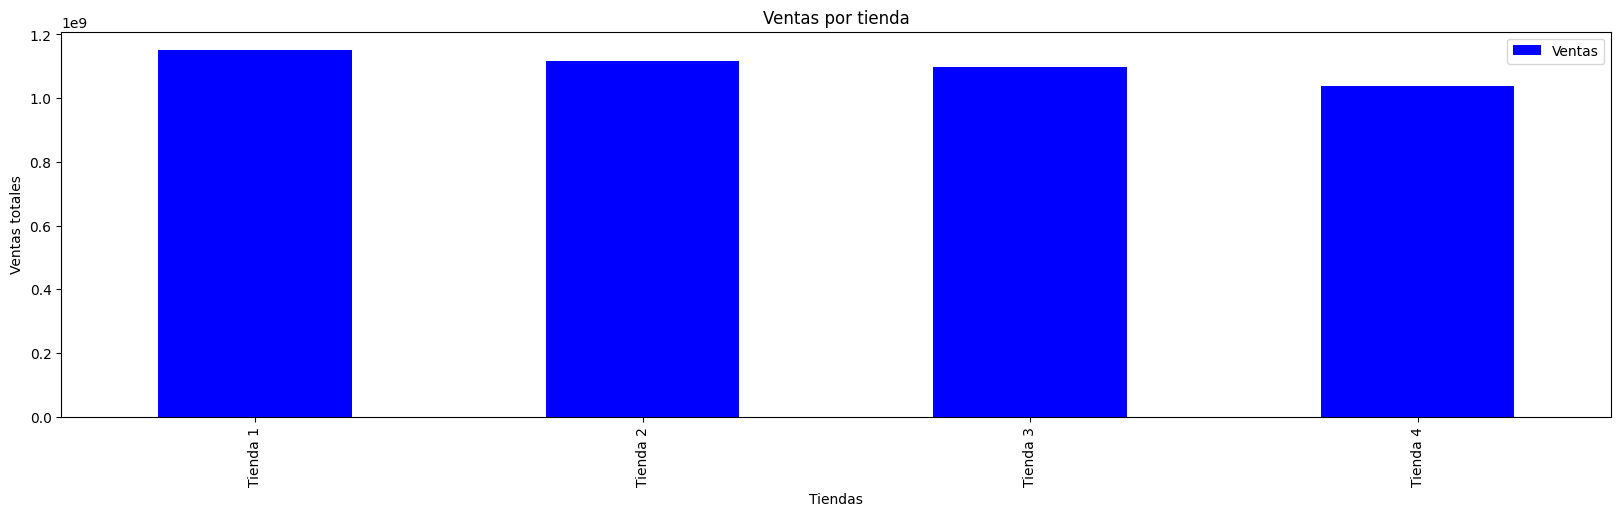

In [48]:
df_ventas.plot(kind='bar', figsize=(20,5), color='blue',xlabel='Tiendas', ylabel='Ventas totales',title= 'Ventas por tienda')

##**6.2 Gráfico de calificaciones promedio de clientes por tienda**

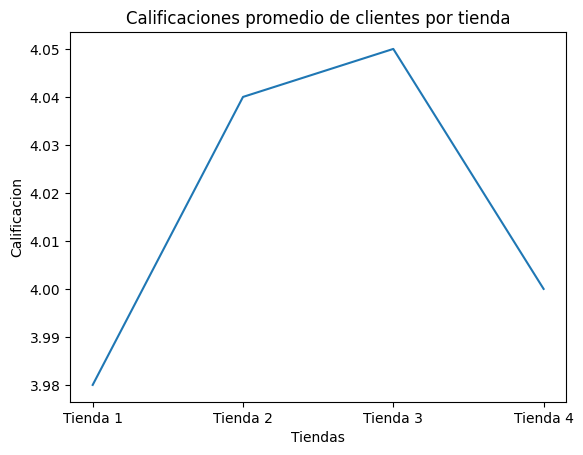

In [49]:
#Gráfico de opiniones de cliente Prom1

# Datos
notas_clientes = [Prom1, Prom2, Prom3, Prom4]

# Crear gráfico
plt.plot(tiendas, notas_clientes)

# Añadir título y etiquetas
plt.title("Calificaciones promedio de clientes por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificacion")

# Mostrar gráfico
plt.show()




In [50]:
df_calificaciones = pd.DataFrame({
    'Tiendas': tiendas,
    'Calificaciones': notas_clientes
})

In [51]:
df_calificaciones

,Tiendas,Calificaciones
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


In [52]:
df_calificaciones.set_index('Tiendas', inplace=True) ## Establecer 'tiendas' como índice (opcional, para etiquetas en el eje X)


<Axes: title={'center': 'Calificaciones promedio de clientes por tienda'}, xlabel='Tiendas', ylabel='Calificación'>

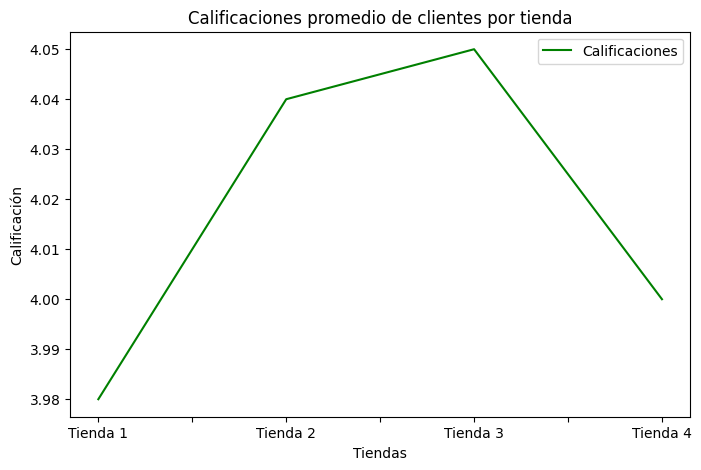

In [53]:
df_calificaciones.plot(kind='line', figsize=(8,5), color='green',xlabel='Tiendas', ylabel='Calificación',title= 'Calificaciones promedio de clientes por tienda')

##**6.3 Gráfico de costos totales de envío por tienda**

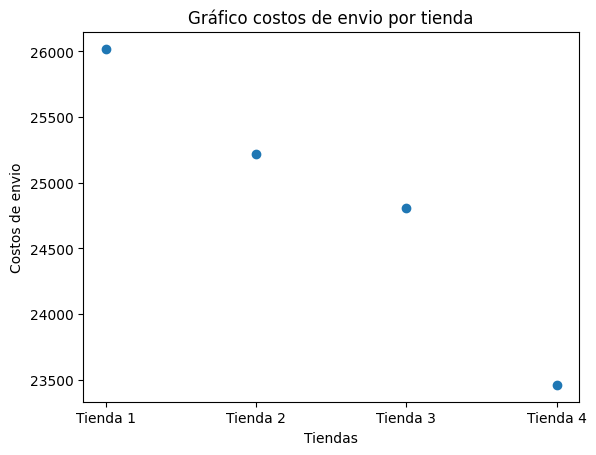

In [54]:
import matplotlib.pyplot as plt

df_costos_envio = [envio_1 , envio_2, envio_3, envio_4]

# Crear gráfico


plt.scatter(tiendas, df_costos_envio)
plt.title('Gráfico costos de envio por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costos de envio')
plt.show()

In [55]:
'''
import numpy as np

# Categorías de productos
categorias = ['Electrónica', 'Ropa', 'Alimentos', 'Juguetes']

# Ventas de cada tienda por categoría
ventas_tienda_1 = [5000, 7000, 6000, 3000]
ventas_tienda_2 = [4500, 8000, 5500, 4000]

# Posiciones en el eje X
x = np.arange(len(categorias))  # [0, 1, 2, 3]
ancho_barra = 0.35  # ancho de cada barra

# Crear gráfico
fig, ax = plt.subplots()

# Dibujar las barras para cada tienda
barras1 = ax.bar(x - ancho_barra/2, ventas_tienda_1, width=ancho_barra, label='Tienda 1')
barras2 = ax.bar(x + ancho_barra/2, ventas_tienda_2, width=ancho_barra, label='Tienda 2')

# Etiquetas y título
ax.set_xlabel('Categorías de Productos')
ax.set_ylabel('Ventas ($)')
ax.set_title('Comparación de Ventas por Categoría')
ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

'''

"\nimport numpy as np\n\n# Categorías de productos\ncategorias = ['Electrónica', 'Ropa', 'Alimentos', 'Juguetes']\n\n# Ventas de cada tienda por categoría\nventas_tienda_1 = [5000, 7000, 6000, 3000]\nventas_tienda_2 = [4500, 8000, 5500, 4000]\n\n# Posiciones en el eje X\nx = np.arange(len(categorias))  # [0, 1, 2, 3]\nancho_barra = 0.35  # ancho de cada barra\n\n# Crear gráfico\nfig, ax = plt.subplots()\n\n# Dibujar las barras para cada tienda\nbarras1 = ax.bar(x - ancho_barra/2, ventas_tienda_1, width=ancho_barra, label='Tienda 1')\nbarras2 = ax.bar(x + ancho_barra/2, ventas_tienda_2, width=ancho_barra, label='Tienda 2')\n\n# Etiquetas y título\nax.set_xlabel('Categorías de Productos')\nax.set_ylabel('Ventas ($)')\nax.set_title('Comparación de Ventas por Categoría')\nax.set_xticks(x)\nax.set_xticklabels(categorias)\nax.legend()\n\n# Mostrar el gráfico\nplt.tight_layout()\nplt.show()\n\n"

#**7. Conclusiones**

Al analizar detenidamente los datos proporcionados podemos obtener las siguientes conclusiones:

1. La tienda que más vende es la tienda 1 y la que menos vende es la tienda 4, existiendo una diferencia de ventas de $112,504.700 a favor de la tienda 1.

2. Las tiendas mejor evaluadas son la 3 y la 2 con notas promedio de 4.05 y 4.04 respectivamente. Y las peores evaluadas fueron la tienda 1 con nota de 3.98 y la 4 con nota 4.

3. La tienda 4 obtuvo el menor costo de envío promedio con $23,459, seguida por la tienda 3 con 24,805, luego la tienda 2 con 25,216 y finalmente, la tienda 1 con el mayor costo promedio de envío 26,018.


Se decidió desechar los factores de categorías de productos más y menos vendida y los productos más y menos vendidos, ya que las ventas totales, calificaciones de clientes y costos de envíos, entregaban mejor información para la recomendación solicitada. Los factores desechados, podrían ser útiles en caso de tener datos asociados a los costos de cada producto, esto con el fin de determinar que productos marginan más y así una tienda podría tener menos probabilidades de venderse, si se verifica que vende mayor cantidad de productos con mejor margen.

Para finalizar, este estudio recomienda vender la tienda 4, ya que es la que presenta menor volumen de ventas y es la segunda tienda peor evaluada. Si bien, esta tienda es la que ofrece menores costos de envío, este valor es despreciable frente a la diferencia con los volúmenes de venta de las otras tiendas.

Se recomienda además, tomar las mejores prácticas de atención a clientes de las tiendas 2 y 3, para implementarlas la tienda 1 y así poder mejorar el volumen de ventas.



#**Extra**

Explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

##**Tienda 1**

In [79]:
venta_por_geografia_1 = tienda1.groupby(['lat','lon'])['Precio'].sum()
nota_por_geografia_1 = tienda1.groupby(['lat','lon'])['Calificación'].mean()

In [82]:
venta_por_geografia_1 = pd.DataFrame(venta_por_geografia_1)
nota_por_geografia_1 = pd.DataFrame(nota_por_geografia_1)

In [84]:
venta_por_geografia_1

,,Precio
lat,lon,
-4.21528,-69.94056,14669800.0
1.21361,-77.28111,14996400.0
2.92730,-75.28189,3494000.0
3.43722,-76.52250,154493700.0
3.86530,-67.92390,2722500.0
4.14200,-73.62664,7161900.0
4.53389,-75.68111,4615700.0
4.57937,-74.21682,4126000.0
4.60971,-74.08175,440005000.0


In [85]:
nota_por_geografia_1

,,Calificación
lat,lon,
-4.21528,-69.94056,4.156250
1.21361,-77.28111,4.043478
2.92730,-75.28189,4.500000
3.43722,-76.52250,3.985866
3.86530,-67.92390,4.000000
4.14200,-73.62664,4.090909
4.53389,-75.68111,3.357143
4.57937,-74.21682,4.600000
4.60971,-74.08175,4.089431


<Axes: xlabel='lat', ylabel='lon'>

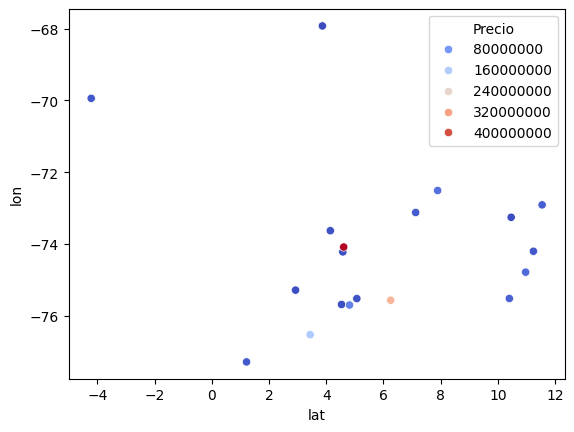

In [99]:
from os import name
import seaborn as sb
sb.scatterplot(x='lat', y='lon', data=venta_por_geografia_1, hue='Precio', palette='coolwarm')

<Axes: xlabel='lat', ylabel='lon'>

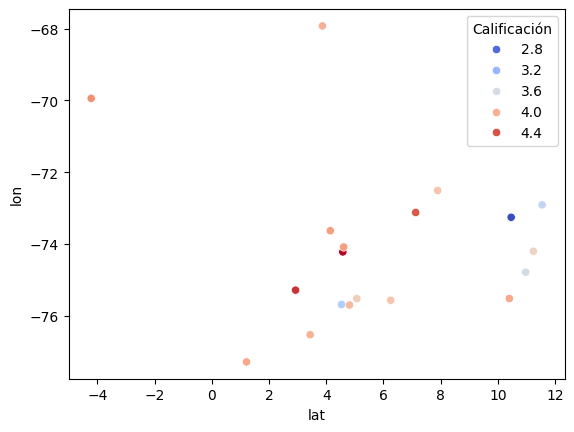

In [87]:
sb.scatterplot(x="lat", y="lon", data=nota_por_geografia_1, hue="Calificación", palette="coolwarm")

##**Tienda 2**

In [88]:
venta_por_geografia_2 = pd.DataFrame(tienda2.groupby(['lat','lon'])['Precio'].sum())
nota_por_geografia_2 = pd.DataFrame(tienda2.groupby(['lat','lon'])[['Calificación']].mean())

<Axes: xlabel='lat', ylabel='lon'>

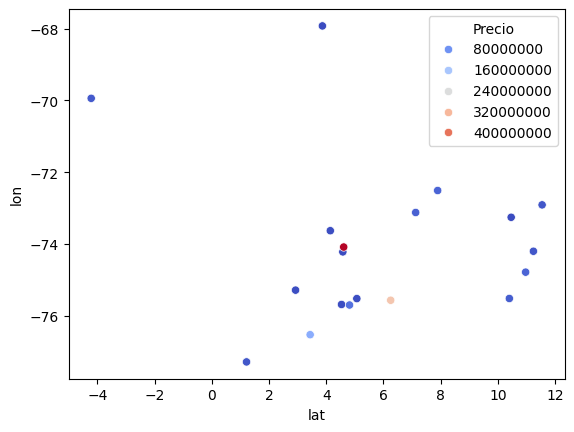

In [89]:
sb.scatterplot(x="lat", y="lon", data=venta_por_geografia_2, hue="Precio", palette="coolwarm")

<Axes: xlabel='lat', ylabel='lon'>

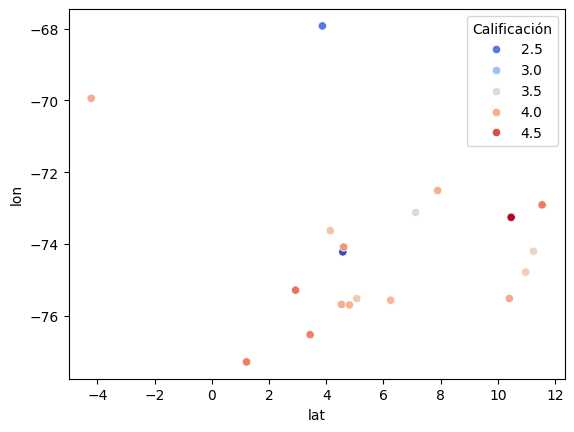

In [90]:
sb.scatterplot(x="lat", y="lon", data=nota_por_geografia_2, hue="Calificación", palette="coolwarm")

##**Tienda 3**

In [91]:
venta_por_geografia_3 = pd.DataFrame(tienda3.groupby(['lat','lon'])['Precio'].sum())
nota_por_geografia_3 = pd.DataFrame(tienda3.groupby(['lat','lon'])[['Calificación']].mean())

<Axes: xlabel='lat', ylabel='lon'>

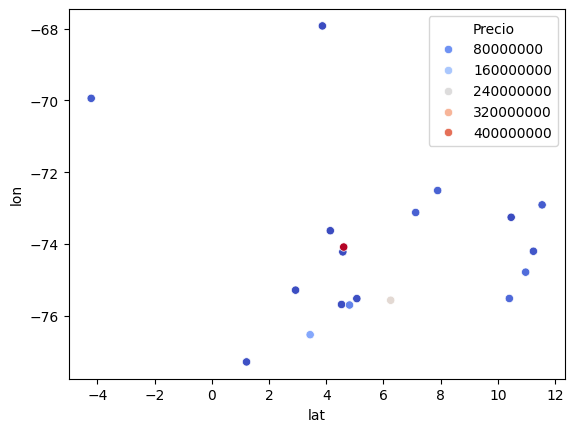

In [92]:
sb.scatterplot(x="lat", y="lon", data=venta_por_geografia_3, hue="Precio", palette="coolwarm")

<Axes: xlabel='lat', ylabel='lon'>

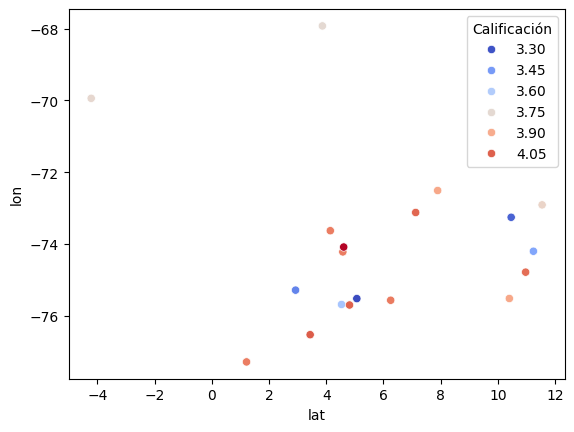

In [93]:
sb.scatterplot(x="lat", y="lon", data=nota_por_geografia_3, hue="Calificación", palette="coolwarm")

##**Tienda 4**

In [94]:
venta_por_geografia_4 = pd.DataFrame(tienda4.groupby(['lat','lon'])['Precio'].sum())
nota_por_geografia_4 = pd.DataFrame(tienda4.groupby(['lat','lon'])[['Calificación']].mean())

<Axes: xlabel='lat', ylabel='lon'>

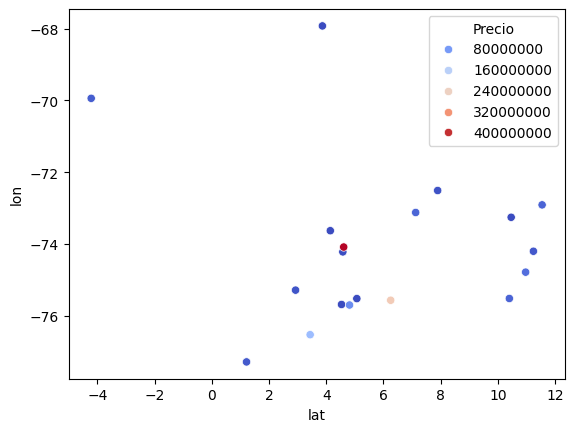

In [95]:
sb.scatterplot(x="lat", y="lon", data=venta_por_geografia_4, hue="Precio", palette="coolwarm")

<Axes: xlabel='lat', ylabel='lon'>

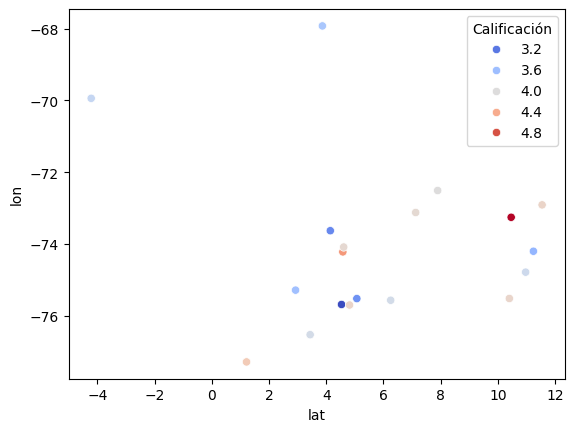

In [96]:
sb.scatterplot(x="lat", y="lon", data=nota_por_geografia_4, hue="Calificación", palette="coolwarm")